In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2022-09-06 14:58:42.945424: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
/home/patatone/miniconda3/envs/dp/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Loading and preparing data 

In [2]:
#importing the mnist data set to run it through the neural network
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
#each image is a 28 x 28 pixel image
x_train[0].shape

(28, 28)

In [4]:
#the 2 dimensional array for the first element in the training batch
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

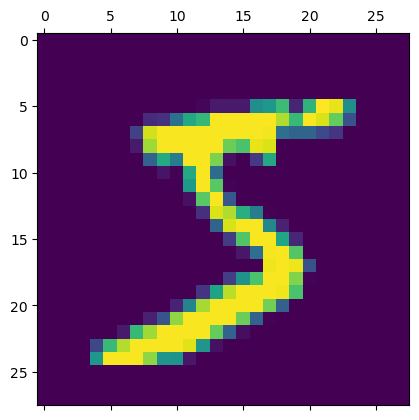

In [5]:
plt.matshow(x_train[0])

In [6]:
#each image has been labelled
y_train[0]

5

In [7]:
#scaling the matrices to improve model perfomance
x_train = x_train / 255
x_test = x_test / 255

In [8]:
#for each pixel in the image there will be a neuron to take care of it
#so the 2d array has to be flattened into a 1d array
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [9]:
x_test_flattened.shape

(10000, 784)

In [10]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Creating a 1 layer neural network

In [11]:
#creating a simple nn
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
#choosing what loss function to optimize and what algorithm to use to do that
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
#setting the number of training loops
model.fit(x_train_flattened, y_train, epochs=5)

2022-09-06 14:59:13.288349: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-09-06 14:59:13.296006: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-09-06 14:59:13.563869: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:927] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-06 14:59:13.563922: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:07:00.0 name: NVIDIA GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.755GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2022-09-06 14:59:13.563936: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-09-06 14:59:13.600513: I tensorflow/stream_executor/platfo

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7130 - accuracy: 0.8155
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3071 - accuracy: 0.9134
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2903 - accuracy: 0.9192
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2815 - accuracy: 0.9214
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2553 - accuracy: 0.9289


In [12]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2679 - accuracy: 0.9261


[0.26790928840637207, 0.9261000156402588]

In [13]:
#the values in the array are the scores for each one of the neurons in the output layer of the nn.
#so there will be 10 values in the array representing the activation score for the corresponding neuron
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

array([2.0869216e-02, 2.5194623e-07, 6.2178168e-02, 9.5804429e-01,
       2.0721664e-03, 1.1416397e-01, 1.0623077e-06, 9.9980682e-01,
       1.1109470e-01, 5.9507477e-01], dtype=float32)

In [14]:
#this numpy function returns the index of the maximum value in the array, this being the predicted number.
np.argmax(y_predicted[0])

7

In [15]:
#creating a new array with all the prediction outcomes to then make a confusion matrix
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [16]:
#building a confusion matrix to see how well the model works
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    5,    4,    2,    2,    0],
       [   0, 1107,    3,    2,    0,    1,    4,    2,   16,    0],
       [   7,    8,  929,   14,    7,    5,   10,    9,   39,    4],
       [   4,    0,   21,  912,    0,   29,    1,   11,   25,    7],
       [   2,    1,    8,    1,  907,    0,    7,    4,   13,   39],
       [   9,    2,    6,   22,    7,  790,    9,    6,   35,    6],
       [  12,    3,   12,    0,    8,   16,  898,    2,    7,    0],
       [   1,    5,   23,    7,    4,    0,    0,  954,    3,   31],
       [   6,    6,    7,   17,    9,   22,    7,   12,  883,    5],
       [  10,    5,    1,    9,   22,    8,    0,   27,   10,  917]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

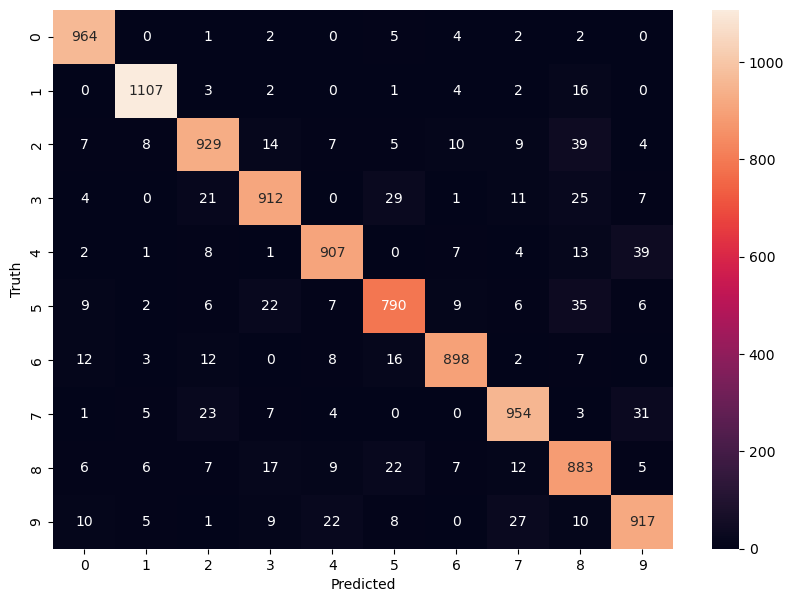

In [17]:
#using seaborn library to better visualize the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Adding a hidden layer to the neural network

### This will improve the models performance

In [18]:
#creating a simple nn
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
]) 

#choosing what loss function to optimize and what algorithm to use to do that
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

#setting the number of training loops
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4512 - accuracy: 0.8740
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1311 - accuracy: 0.9624
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0863 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0647 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0490 - accuracy: 0.9850


In [19]:
#with just one more hidden layer the model has drastically improved its performance
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0762 - accuracy: 0.9752


[0.0761665627360344, 0.9751999974250793]

Text(95.72222222222221, 0.5, 'Truth')

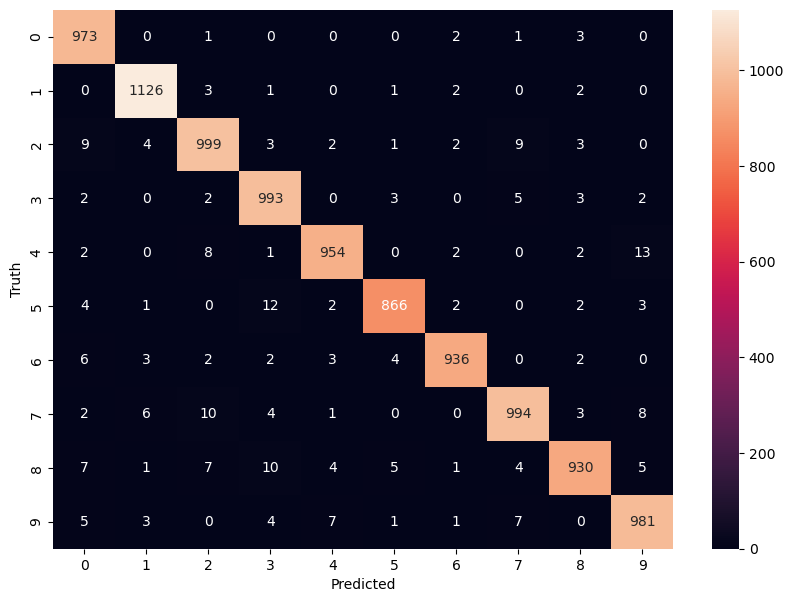

In [20]:
#replotting a confusion matrix for the new model
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#the model now shows a much higher accuracy predicting the right number